In [131]:
log_file = "./outcomes/medish.log"

In [132]:
import numpy as np
import pandas as pd
from coba.benchmarks import Result

In [133]:
result = Result.from_file(log_file)

In [134]:
l,s,b = result.to_pandas()

repeat_cols = { col:np.repeat(b[col].values, b['N'].str.len()) for col in b.columns.drop(['N','reward']) }
spread_cols = { col:np.concatenate(b[col].values) for col in ['N', 'reward'] }
index_col   = { "index":1+np.concatenate([ np.arange(i) for i in b['N'].str.len() ]) }

r         = pd.DataFrame({**repeat_cols, **spread_cols, **index_col})
pca_1_ids = s[s['pipe'].str.contains("PCA") & s['pipe'].str.contains("\[0\]")].simulation_id.values
pca_2_ids = s[s['pipe'].str.contains("PCA") & s['pipe'].str.contains("\[1\]")].simulation_id.values
std_ids   = s[~s['pipe'].str.contains("PCA")].simulation_id.values
cmp_ids   = b.simulation_id.value_counts().reset_index(name="count").query(f"count == {len(l)}")["index"]

<AxesSubplot:xlabel='index'>

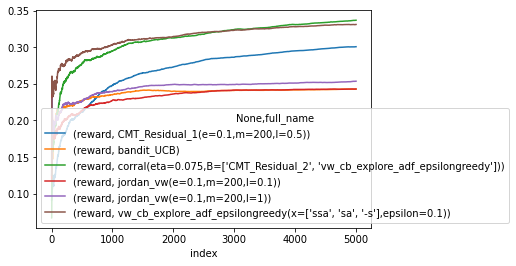

In [135]:
#This plots using three shuffles of the base data sets
is_std = r.simulation_id.isin(std_ids)
pd.merge(r[is_std],l).groupby(['full_name', 'index']).agg({"reward":"mean"}).unstack(level=0).expanding().mean().plot()

<AxesSubplot:xlabel='index'>

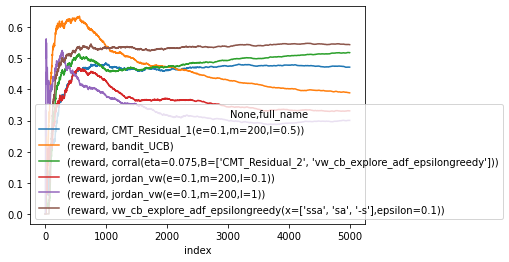

In [136]:
#This plots applying PCA transform to context and then sorting interaction on 1st component
is_pca_1 = r.simulation_id.isin(pca_1_ids)
pd.merge(r[is_pca_1],l).groupby(['full_name', 'index']).agg({"reward":"mean"}).unstack(level=0).expanding().mean().plot()

<AxesSubplot:xlabel='index'>

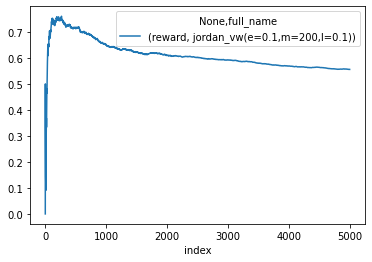

In [137]:
#This plots applying PCA transform to context and then sorting interaction on 1st component
is_pca_2 = r.simulation_id.isin(pca_2_ids)
pd.merge(r[is_pca_2],l).groupby(['full_name', 'index']).agg({"reward":"mean"}).unstack(level=0).expanding().mean().plot()

<AxesSubplot:xlabel='index'>

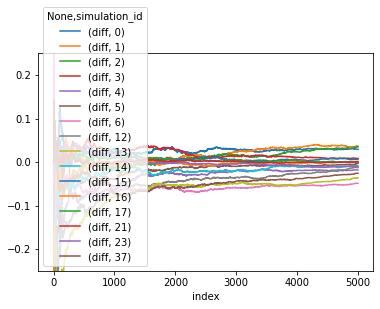

In [138]:
#This plots the difference between VW_epsilon_greedy and CMT_Residual by simulation
is_complete_std = r.simulation_id.isin(std_ids) & r.learner_id.isin([3,5])

z = pd.merge(r[r['learner_id'] == 3], r[r['learner_id'] == 5], on=['simulation_id','index'])
z.assign(diff=z['reward_y']-z['reward_x']).groupby('index').agg({"diff":["mean"]}).expanding().mean()

z.assign(diff=z['reward_y']-z['reward_x']).groupby(['simulation_id', 'index']).agg({"diff":"mean"}).unstack(level=0).expanding().mean().plot(ylim=(-0.25,0.25))